<a href="https://colab.research.google.com/github/amitmldlai/Data-Visualization/blob/main/Exploratory_Data_Analysis_on_Haberman_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Data Fields:


*   age: Age of Patient
*   year: Year of treatment
*   nodes: Number of Auxillary nodes 
*   status: 1(Patient survived 5 years down the treatment), 2(Patient dies within 5 year down the treatment)



Imports

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [78]:
df = pd.read_csv('haberman.csv')
df.head(3)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1


High level statistics of the dataset: 
1. Number of Data Points
2. Numer of Features 
3. Number of Classes
4. Number of data-points per class

In [77]:
print('Number of points :', df.shape[0])
print(f'Numer of features : {len(df.columns)}')
print(f'Number of classes : {len(df.status.unique())}')
print(f'Number of data points in class 1 : {df.status.value_counts().tolist()[0]}')
print(f'Number of data points in class 2 : {df.status.value_counts().tolist()[1]}')

Number of points : 306
Numer of features : 4
Number of classes : 2
Number of data points in class 1 : 225
Number of data points in class 2 : 81


All fields in single plot

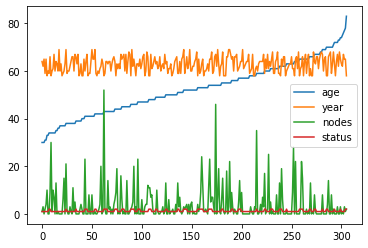

In [38]:
df.plot()

Survival Status Distribution

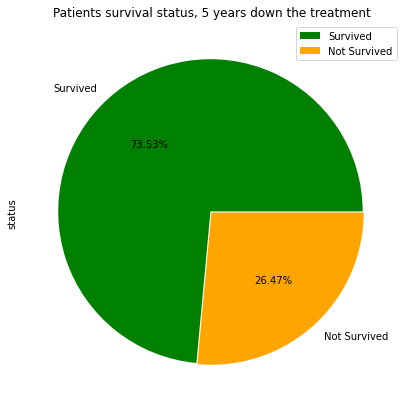

In [39]:
plt.figure(figsize=(8,7))
plt.title("Patients survival status, 5 years down the treatment")
df.status.value_counts().plot.pie(explode = [0.01,0], autopct = '%0.2f%%', labels = ["Survived" ,"Not Survived"], colors = ["green" ,"orange"])
plt.legend(["Survived", "Not Survived"] , loc = "upper right")
plt.show()

**Objective:** 
    To understand which features are useful for classification, using different graphical plots.


###Scatter Plot

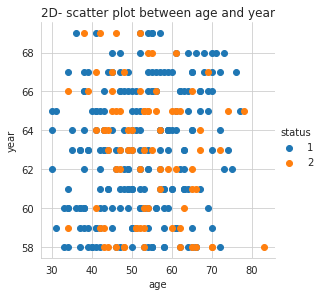

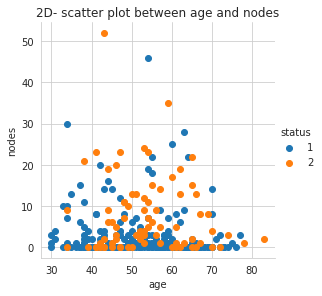

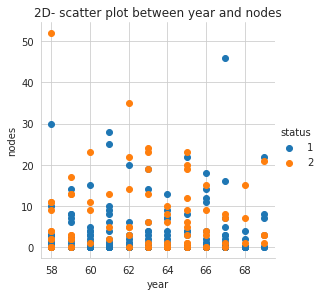

In [79]:
data_features = [('age', 'year'), ('age', 'nodes'), ('year', 'nodes')]
for data in data_features:
    sns.set_style("whitegrid");
    sns.FacetGrid(df, hue="status", height=4).map(plt.scatter, data[0], data[1]).add_legend()
    plt.title(f'2D- scatter plot between {data[0]} and {data[1]}') 
    plt.show()

   ***Observation(s):***
        
1. Using age and year features, we can distinguish between class label to some extent.
2. Using nodes and age features, we can provide approx conclusion that patients with less than 40 years of age survived 5 years or longer(class label :1)
3. Using features nodes and year , we cannot provide any conclusion as they have considerable overlap. 

###Pairplot

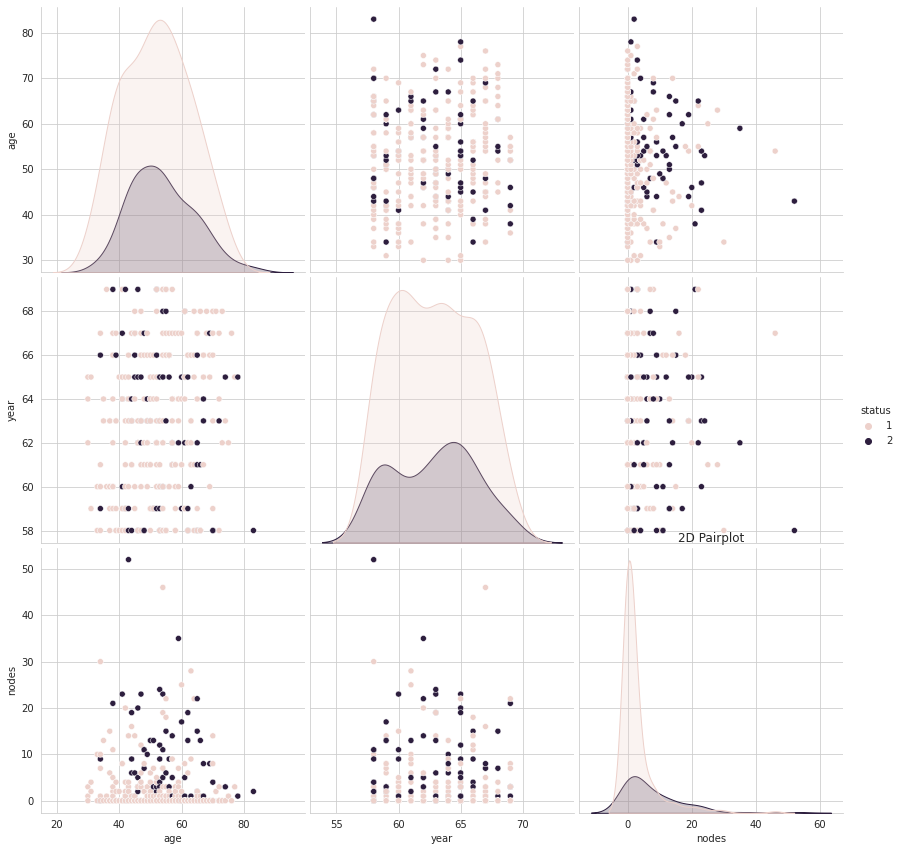

In [72]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="status", height=4)
plt.title('2D Pairplot')
plt.show()

***Observation(s):***

1. Using age and year features, we can distinguish between class label to some extent.
2. Using nodes and age features, we can provide conclusion that patients with less than 35 years of age survived 5 years or longer(class label :1)
3. Using features nodes and year , we cannot provide any conclusion as they have considerable overlap.

###3D Visualization

In [ ]:
fig = px.scatter_3d(df, x='year', y='age', z='nodes', color='status')
fig.update_layout(title_text='3D plot for dataset', title_x=.5)
fig.show()

***Observation(s):***

1. Most of the data points lie at the bottom of the cube for class label 1 when we see above graph keeping nodes on y axis.
2. Most of data points lie in the range of age 45 to 55 when the graph is rotated to have age on y axis.

###Distplot

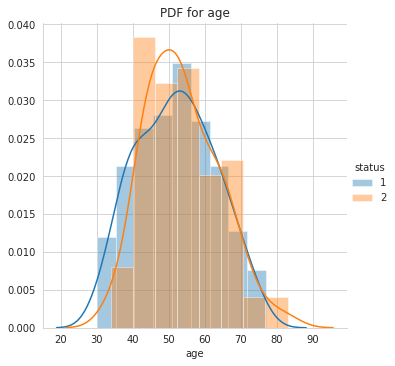

In [ ]:
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "age").add_legend()
plt.title('PDF for age')   
plt.show()

***Observation(s):***

1. Using feature age, we can provide conclusion that patients with less than 35 years of age survived 5 years or longer(class label :1) and patients with more than 75 years of age died within 5 year(class label: 2)
2. There are high chances for patient who falls around age group of 50 years to die within 5 year .


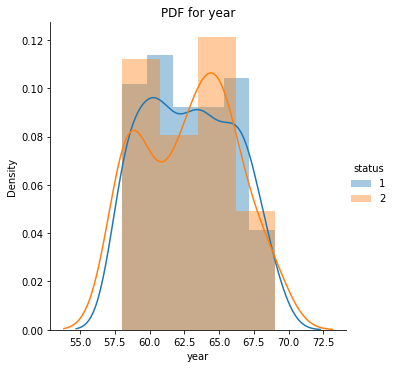

In [55]:
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "year").add_legend()
plt.title('PDF for year')     
plt.show()

***Observation(s):***

1. Using feature year, we cannot conclude much as they have considerable overlap between data points.

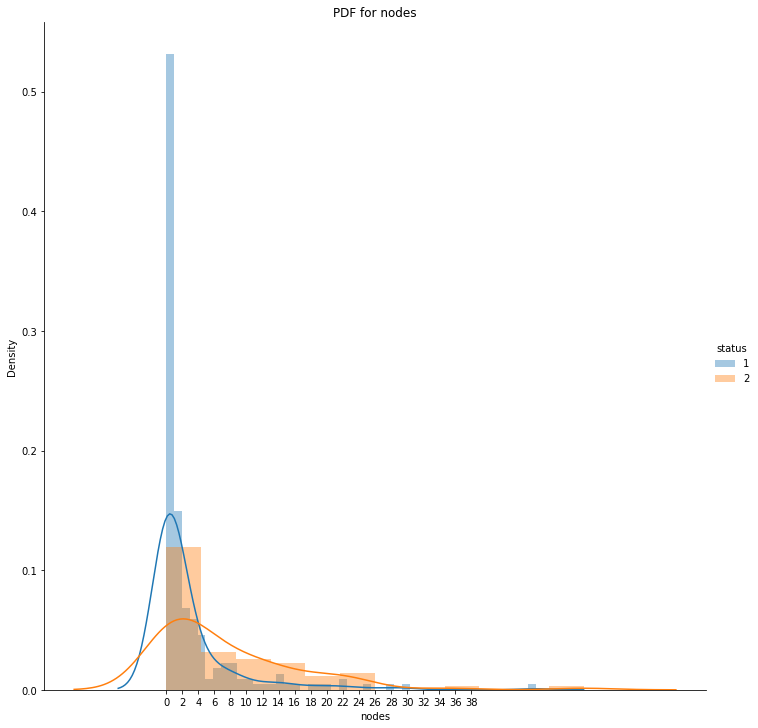

In [59]:
sns.FacetGrid(df, hue="status", height=10)   .map(sns.distplot, "nodes").add_legend()
plt.xticks([data for data in range(0,40) if data % 2 == 0])
plt.title('PDF for nodes')
plt.show()

***Observation(s):***

1. Using feature nodes, if a patient have Number of positive axillary nodes less equal to 2 then its more probable patient will will survive 5 years or longer.
2. Also there are more chances that for any value for nodes > 4 , patient can die within 5 year after the treatment.

###Boxplot

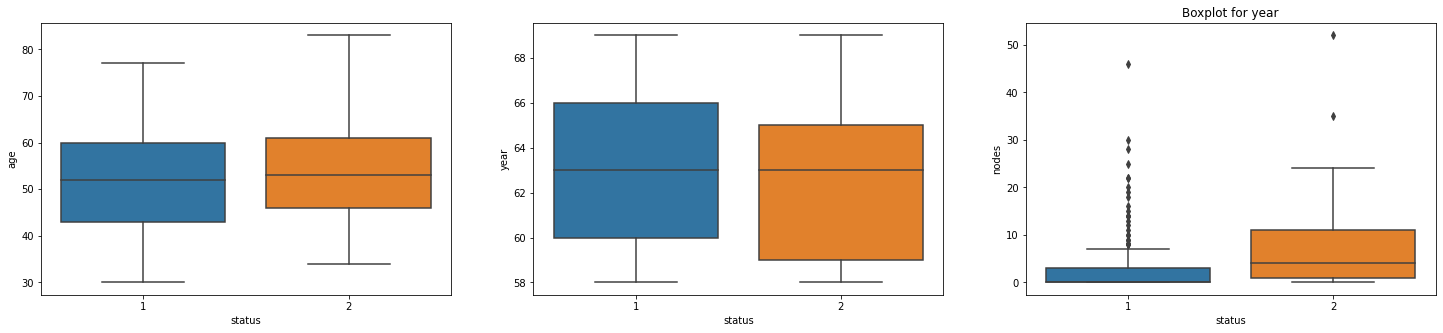

In [68]:
fig, ax = plt.subplots(1, 3, figsize=(25,5))
sns.boxplot(x='status', y='age', data=df, ax=ax[0])
sns.boxplot(x='status',y='year', data=df, ax=ax[1])
sns.boxplot(x='status',y='nodes', data=df, ax=ax[2])
plt.show()

***Observation(s):***

1. If age < 44 , patient belongs to class 1

3. Using feature year, after year > 1965 all patients belongs to class 1
4. For year < 1960 all patients belongs to class 2

5. using fetaure, if nodes < = 2, all patients belong to class 1
6. After node > 2 , there is considerable overlap between datapoints, hence difficult to come up with any declaration.


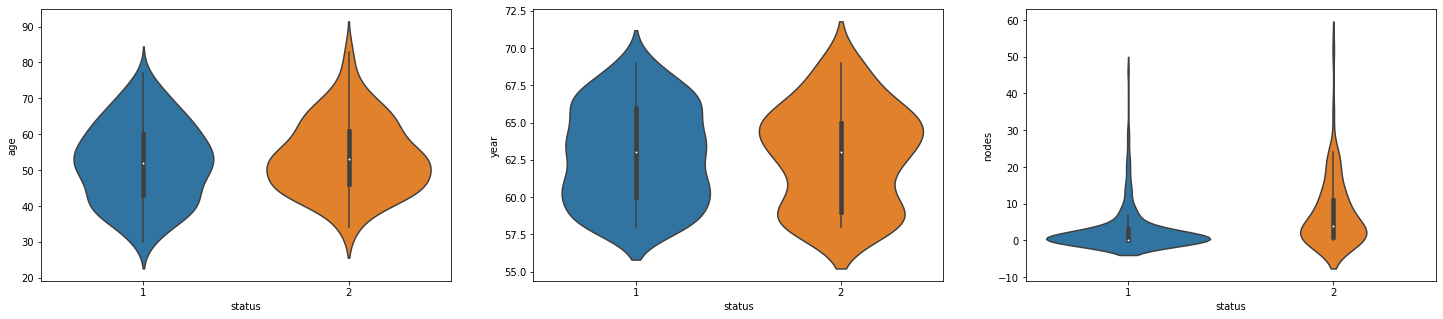

In [70]:
fig, ax = plt.subplots(1, 3, figsize=(25,5))
sns.violinplot(x='status',y='age', data=df, ax=ax[0])
sns.violinplot(x='status',y='year', data=df, ax=ax[1])
sns.violinplot(x='status',y='nodes', data=df, ax=ax[2])
plt.show()

***Observation(s):***

**Age:**
    
1. Using feature age, we can say maximum treatment was done for age group of around 55 who belongs to class 1.
2. For calss 2, maximum treatment was done for age group of 48 to 50.
3. If age > 60 , patient belongs to class 2
4. If age < 44 , patient belongs to class 1

**Year:**
    
1. Using year as feature, maximum treatments of patients who fall in class label 1 is around from 1958 to 1960
2. For class 2 , maximum treatments of patients was done in year approx to 1964 to 1965
3. After year > 1965 all patients belongs to class 1
4. For year < 1960 all patients belongs to class 2

**Nodes:**
    
1. Using nodes as fetaure, max treatment was done in both class when nodes lies in 0 to 2.
2. After node > 2 , there is considerable overlap between datapoints, hence difficult to come up with any declaration.



###Jointplot

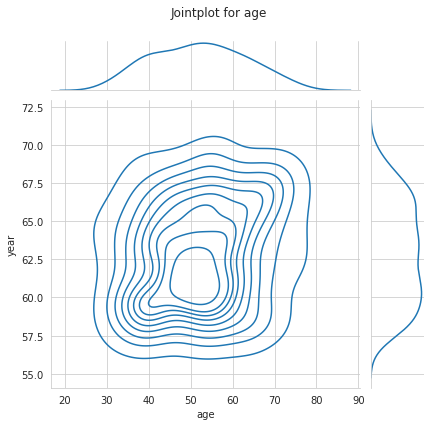

In [86]:
df_1 = df[df.status == 1]
sns.jointplot(x="age", y="year", data=df_1, kind="kde");
plt.suptitle('Jointplot for age')
plt.subplots_adjust(top=0.90)
plt.show()

***Observation(s):***

1. For datapoints in class label 1 , we have more data points belonging to region of age (45 to 55) and year (1958 to 1963)
2. For age feature , we have maximum data points around age of 50 t0 55 (look to distribution at top)
3. For year as feature, maximum treatments of patients who fall in class label 1 is around from 1958 to 1960(look to distribution at RHS)

###PDF/CDF

0.21276595744680854


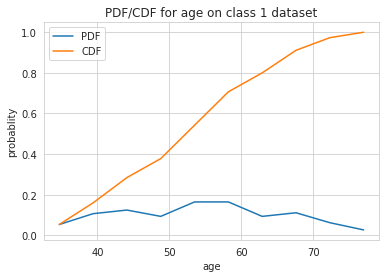

In [81]:
df_1 = df[df.status == 1]
counts, bin_edges = np.histogram(df_1['age'], bins=10, 
                                 density = True)
print(sum(counts))
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label= 'PDF');
plt.plot(bin_edges[1:], cdf, label= 'CDF')
plt.xlabel("age")
plt.ylabel("probablity")
plt.title("PDF/CDF for age on class 1 dataset")
plt.legend()
plt.show()

***Observation(s):***

1. Using feature age, we can say that maximum population lies in age group of 53.5 to 58.2 who survive 5 years or longer.
2. 80% population with class labelas 1 has age<=65.

0.2040816326530612


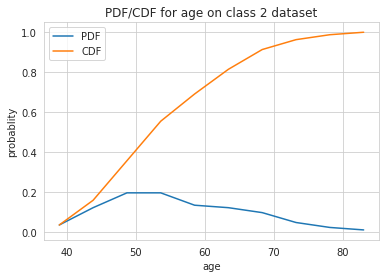

In [84]:
df_2 = df[df.status == 2]
counts, bin_edges = np.histogram(df_2['age'], bins=10, 
                                 density = True)
print(sum(counts))
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = 'PDF');
plt.plot(bin_edges[1:], cdf, Label= 'CDF')
plt.title("PDF/CDF for age on class 2 dataset")
plt.legend()
plt.xlabel("age")
plt.ylabel("probablity")
plt.show()

***Observation(s):***

1. Using feature age, we can say that maximum population lies in age group of 48 to 55 who die within 5 year after the treatment.
2. 80% population with class labelas 2 has age<=64.

###Final Conlusion

**Conclusion**


* Using feature age, we can provide conclusion that patients with less than 35 years of age survived 5 years or longer(class label :1) and patients with more than 75 years of age died within 5 year(class label: 2)

* There are high chances for patient who falls around age group of 50 years to die within 5 year .

* Using feature age, we can say that maximum population lies in age group of 53.5 to 58.2 who survive 5 years or longer.

* Using feature age, we can say that maximum population lies in age group of 48 to 55 die within 5 year after the treatment.

* 80% population with class labelas 1 has age<=65.

* 80% population with class labelas 2 has age<=64.

* Using feature nodes, if a patient have Number of positive axillary nodes less equal to 2 then its more probable patient will will survive 5 years or longer.

* Also there are more chances that for any value for nodes > 4 , patient can die within 5 year after the treatment.

* Using nodes as fetaure, max treatment was done in both class when nodes lies in 0 to 2.

* Using feature year, after year > 1965 all patients belongs to class 1

* For year < 1960 all patients belongs to class 2

* Using year as feature, maximum treatments of patients who fall in class label 1 is around from 1958 to 1960

* For class 2 , maximum treatments of patients was done in year approx to 1964 to 1965






































